In [1]:
#Libraries
import pandas as pd
import numpy as np
import boto3
import yfinance as yf
import json

In [82]:
file= open(r"C:\Users\akash\Desktop\UNH\Sem2\DSDE\Project\credentials.json")
credentials= json.load(file)


In [83]:
aws_access_key_id = credentials["aws_access_key_id"]
aws_secret_access_key = credentials["aws_secret_access_key"]
aws_session_token = credentials["aws_session_token"]

In [84]:
#AWS session
session = boto3.Session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    aws_session_token=aws_session_token
)

In [85]:
#Session Test
s3 = session.client('s3')
# List S3 buckets
response = s3.list_buckets()
buckets = [bucket['Name'] for bucket in response['Buckets']]
print("S3 Buckets:")
for bucket in buckets:
    print(bucket)

S3 Buckets:
akashthakkar.lab2.com
aws-logs-590184147181-us-east-1
final-project-stock-predict
lab-2-bucket
lab-bucket-one
sparkify-5-ak
sparkify-lab-3


In [ ]:
def fetch_sp400_symbols():
    try:
        # Retrieve the list of S&P 400 companies from a reliable source
        # Replace the URL with the appropriate source if available
        sp400_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_400_companies')[0]
        
        # Extract symbols
        symbols = sp400_companies['Symbol'].tolist()
        return symbols
    except Exception as e:
        print(f"Error fetching S&P 400 symbols: {str(e)}")
        return None

# Function to fetch symbols for all companies in the S&P 600 index
def fetch_sp600_symbols():
    try:
        # Retrieve the list of S&P 600 companies from a reliable source
        # Replace the URL with the appropriate source if available
        sp600_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_600_companies')[0]
        
        # Extract symbols
        symbols = sp600_companies['Symbol'].tolist()
        return symbols
    except Exception as e:
        print(f"Error fetching S&P 600 symbols: {str(e)}")
        return None
    
def fetch_sp500_data():
    try:
        # Retrieve the list of S&P 500 companies
        sp500_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
        sp500_symbols = sp500_companies['Symbol'].tolist()

        # Create an empty DataFrame to store all data
        

        # Loop through each symbol and fetch data
        

        return sp500_symbols
    except Exception as e:
        print(f"Error fetching S&P 500 symbols: {str(e)}")
        return None

In [ ]:
def fetch__symbols():
    # Fetch symbols for S&P 400 and S&P 600 indexes
    sp400_symbols = fetch_sp400_symbols()
    sp600_symbols = fetch_sp600_symbols()
    sp500_symbols = fetch_sp500_data()
    if sp400_symbols is None or sp600_symbols is None or sp500_symbols is None:
        print("Failed to fetch symbols for S&P 400 or S&P 600 or S&P 500. Exiting...")
        return None
    
    # Combine the lists of symbols
    sp1000_symbols = sp400_symbols + sp600_symbols + sp500_symbols
    
    # Remove duplicates (if any)
    sp1000_symbols = list(set(sp1000_symbols))
    
    return sp1000_symbols

In [ ]:
def fetch_symbol_data(symbol, start_date, end_date):
    try:
        # Fetch historical data using yfinance
        data = yf.download(symbol, start=start_date, end=end_date)
        if not data.empty:
            data['Symbol'] = symbol  # Add symbol column
            data['Date'] = data.index  # Add date column
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {str(e)}")
        return None

In [ ]:
def fetch_all_data(start_date, end_date):
    # Fetch symbols for all companies in the S&P 1000 index
    symbols = fetch__symbols()
    
    if symbols is None:
        print("Failed to fetch symbols. Exiting...")
        return None
    
    # Create empty lists to store fetched and not fetched symbols
    symbols_fetched = []
    symbols_not_fetched = []
    
    # Create an empty DataFrame to store all data
    all_data = pd.DataFrame()
    
    # Loop through each symbol and fetch data
    for symbol in symbols:
        attempts = 0
        while attempts < 5:  # Try up to 5 times to fetch data
            print(f"Fetching data for {symbol} (Attempt {attempts + 1})...")
            data = fetch_symbol_data(symbol, start_date, end_date)
            if data is not None and not data.empty:
                all_data = pd.concat([all_data, data], ignore_index=True)
                symbols_fetched.append(symbol)
                break  # Exit the loop if data is successfully fetched
            else:
                attempts += 1
                if attempts == 5:
                    symbols_not_fetched.append(symbol)  # Add symbol to the list if not fetched
                    print(f"Unable to fetch data for {symbol} after 5 attempts.")
    
    # Save symbols that were fetched to a CSV file
    if symbols_fetched:
        fetched_df = pd.DataFrame({'Symbol': symbols_fetched})
        fetched_df.to_csv('symbols_fetched.csv', index=False)
        print("Symbols that were fetched saved to symbols_fetched.csv")
    
    # Save symbols that were not fetched to a CSV file
    if symbols_not_fetched:
        not_fetched_df = pd.DataFrame({'Symbol': symbols_not_fetched})
        not_fetched_df.to_csv('symbols_not_fetched.csv', index=False)
        print("Symbols that were not fetched saved to symbols_not_fetched.csv")
    
    return all_data

# Define start and end dates for data retrieval
start_date = datetime(2000, 1, 1)  # January 1, 2000
end_date = datetime.now()  # Current date

# Fetch historical data for all companies in the S&P 1000 index
all_data = fetch_all_data(start_date, end_date)

# Save all data to a CSV file
if all_data is not None and not all_data.empty:
    all_data.to_csv('sp1000_all_data.csv', index=False)
    print("All data saved to sp1000_all_data.csv")
else:
    print("No data fetched. Check the error messages for details.")

In [52]:
data=pd.read_csv(r"C:\Users\akash\Desktop\UNH\Sem2\DSDE\Project\sp1000_all_data.csv")

In [53]:
data.shape

(7411188, 8)

In [54]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
0,32.093750,32.093750,30.34375,31.625000,23.279243,14356400,AMAT,2000-01-03
1,30.437500,31.312500,30.00000,30.062500,22.129076,22822400,AMAT,2000-01-04
2,29.515625,30.046875,28.40625,28.937500,21.300964,27791200,AMAT,2000-01-05
3,28.562500,29.718750,28.06250,28.984375,21.335476,22438000,AMAT,2000-01-06
4,28.187500,29.265625,27.75000,29.234375,21.519495,37732400,AMAT,2000-01-07


In [55]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7.411188e+06,7.411188e+06,7.411188e+06,7.411188e+06,7.411188e+06,7.411188e+06
mean,5.462111e+01,5.534160e+01,5.388150e+01,5.462513e+01,4.782308e+01,2.983577e+06
std,1.228581e+02,1.245192e+02,1.211912e+02,1.228789e+02,1.161443e+02,1.949975e+07
min,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04,0.000000e+00
25%,1.687001e+01,1.714286e+01,1.658333e+01,1.687500e+01,1.266783e+01,2.106000e+05
50%,3.119000e+01,3.164000e+01,3.073171e+01,3.120000e+01,2.460000e+01,6.484000e+05
75%,5.770000e+01,5.842000e+01,5.695098e+01,5.770000e+01,4.889920e+01,1.978500e+06
max,8.097980e+03,8.211400e+03,8.010000e+03,8.099960e+03,8.099960e+03,7.421641e+09


In [42]:
descriptive_stats = data.groupby('Symbol')['Close'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Symbol,,,,,,,,
A,6108.0,49.722804,39.877374,7.761087,22.523248,32.396278,66.902502,179.279999
AA,6108.0,47.484370,24.980743,5.480000,25.471800,39.365570,71.043194,113.782051
AAL,4667.0,24.631421,15.587904,1.760000,11.425000,19.549999,38.575001,62.950001
AAON,6108.0,15.840100,17.903313,0.790123,2.763786,5.989630,23.936666,92.879997
AAP,5630.0,91.283321,60.039343,12.526667,38.155001,71.470001,149.127502,241.910004
...,...,...,...,...,...,...,...,...
ZD,6108.0,40.027323,30.439106,0.244565,17.110869,26.291305,65.358696,132.979996
ZEUS,6108.0,21.342263,12.959977,1.875000,13.260000,21.090000,27.219999,75.919998
ZI,971.0,38.880211,15.984093,12.530000,24.760000,41.270000,50.260000,77.349998


In [56]:
data['Date'] = pd.to_datetime(data['Date'])


In [57]:
data.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Symbol               object
Date         datetime64[ns]
dtype: object

In [45]:
data.isna().value_counts()

Open   High   Low    Close  Adj Close  Volume  Symbol  Date 
False  False  False  False  False      False   False   False    7411188
dtype: int64

In [46]:
earliest_date = data['Date'].min()
earliest_date


Timestamp('2000-01-03 00:00:00')

In [47]:
latest_date=data['Date'].max()
latest_date

Timestamp('2024-04-12 00:00:00')

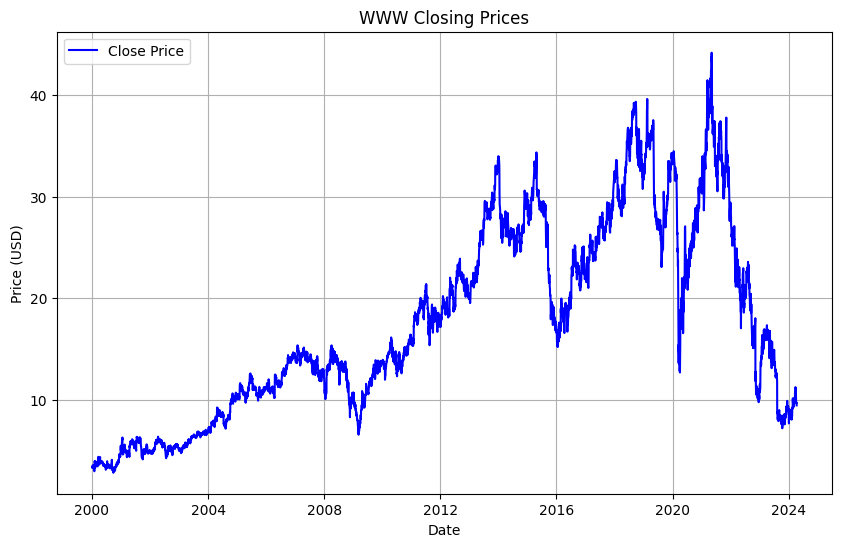

In [76]:
import pandas as pd
import matplotlib.pyplot as plt


symbol_to_plot = "WWW"  

symbol_data = data[data['Symbol'] == symbol_to_plot]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(symbol_data['Date'], symbol_data['Close'], label='Close Price', color='blue')
plt.title(f'{symbol_to_plot} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
#Creating Target Column for Linear Learning
data['target_linear'] = data.groupby('Symbol')['Close'].shift(-1)


In [59]:
data.isna().value_counts()

Open   High   Low    Close  Adj Close  Volume  Symbol  Date   target_linear
False  False  False  False  False      False   False   False  False            7409686
                                                              True                1502
dtype: int64

In [65]:
data = data.dropna(subset=['target_linear'])


In [66]:
data.isna().value_counts()

Open   High   Low    Close  Adj Close  Volume  Symbol  Date   target_linear
False  False  False  False  False      False   False   False  False            7409686
dtype: int64

In [62]:
data_linear = data

In [67]:
data['target_classifier'] = (data["target_linear"] > data["Close"]).astype(int)

In [72]:
data_classifier = data.drop('target_linear',axis=1)

In [78]:
data_linear.to_csv('linear_data.csv',index=False)

In [79]:
data_classifier.to_csv('classifier_data.csv',index=False)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7409686 entries, 0 to 7411186
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Open               float64       
 1   High               float64       
 2   Low                float64       
 3   Close              float64       
 4   Adj Close          float64       
 5   Volume             int64         
 6   Symbol             object        
 7   Date               datetime64[ns]
 8   target_linear      float64       
 9   target_classifier  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(1)
memory usage: 851.6+ MB


In [77]:
data_linear.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,target_linear
0,32.093750,32.093750,30.34375,31.625000,23.279243,14356400,AMAT,2000-01-03,30.062500
1,30.437500,31.312500,30.00000,30.062500,22.129076,22822400,AMAT,2000-01-04,28.937500
2,29.515625,30.046875,28.40625,28.937500,21.300964,27791200,AMAT,2000-01-05,28.984375
3,28.562500,29.718750,28.06250,28.984375,21.335476,22438000,AMAT,2000-01-06,29.234375
4,28.187500,29.265625,27.75000,29.234375,21.519495,37732400,AMAT,2000-01-07,31.593750


In [86]:
s3.upload_file(r"C:\Users\akash\Desktop\UNH\Sem2\DSDE\Project\linear_data.csv", "final-project-stock-predict", "linear_data.csv")

In [87]:
s3.upload_file(r"C:\Users\akash\Desktop\UNH\Sem2\DSDE\Project\classifier_data.csv", "final-project-stock-predict", "classifier_data.csv")

In [24]:
#Upload Data to S3
# s3.create_bucket(Bucket="final-project-stock-predict")

{'ResponseMetadata': {'RequestId': '557XY16W7Q70A9EE',
  'HostId': 'dL+BU6NYdZkbehsvSvkUYebzSyad4M3eRi/7PJHaSFE5bm24zDG+xY8L2+8Z3o52cZOcUp3AnSY=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'dL+BU6NYdZkbehsvSvkUYebzSyad4M3eRi/7PJHaSFE5bm24zDG+xY8L2+8Z3o52cZOcUp3AnSY=',
   'x-amz-request-id': '557XY16W7Q70A9EE',
   'date': 'Tue, 16 Apr 2024 20:27:40 GMT',
   'location': '/final-project-stock-predict',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'Location': '/final-project-stock-predict'}